<a href="https://colab.research.google.com/github/xxnyang/class_repo/blob/chap5/ch5_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mnist data with noise

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


training

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6976 - loss: 1.0806 - val_accuracy: 0.9224 - val_loss: 0.2644
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9137 - loss: 0.2805 - val_accuracy: 0.9321 - val_loss: 0.2294
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9465 - loss: 0.1727 - val_accuracy: 0.9534 - val_loss: 0.1579
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9633 - loss: 0.1202 - val_accuracy: 0.9619 - val_loss: 0.1265
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9733 - loss: 0.0848 - val_accuracy: 0.9651 - val_loss: 0.1163
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0622 - val_accuracy: 0.9604 - val_loss: 0.1350
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9871 - loss: 0.0437 - val_accuracy: 0.9477 - val_loss: 0.1894
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0336 - val_accuracy: 0.

# model with different size

original

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.6899 - loss: 0.6164 - val_accuracy: 0.8641 - val_loss: 0.4283
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8824 - loss: 0.3798 - val_accuracy: 0.8755 - val_loss: 0.3366
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9121 - loss: 0.2748 - val_accuracy: 0.8871 - val_loss: 0.2918
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9318 - loss: 0.2166 - val_accuracy: 0.8909 - val_loss: 0.2772
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9412 - loss: 0.1845 - val_accuracy: 0.8891 - val_loss: 0.2754
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9524 - loss: 0.1520 - val_accuracy: 0.8884 - val_loss: 0.2791
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9568 - loss: 0.1321 - val_accuracy: 0.8868 - val_loss: 0.2883
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accura

lower

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

higher

In [5]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6584 - loss: 0.6338 - val_accuracy: 0.7533 - val_loss: 0.4973
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8490 - loss: 0.3542 - val_accuracy: 0.8510 - val_loss: 0.3415
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9108 - loss: 0.2302 - val_accuracy: 0.8927 - val_loss: 0.2669
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9382 - loss: 0.1669 - val_accuracy: 0.8882 - val_loss: 0.2817
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9529 - loss: 0.1264 - val_accuracy: 0.8890 - val_loss: 0.2830
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9733 - loss: 0.0849 - val_accuracy: 0.8860 - val_loss: 0.3232
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9727 - loss: 0.0845 - val_accuracy: 0.8874 - val_loss: 0.2940
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9962 - loss: 0.0287 - val_accuracy: 0.8845 - 

plot

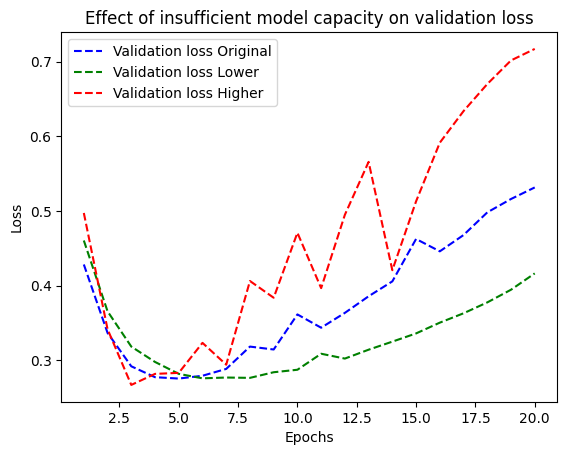

In [6]:
import matplotlib.pyplot as plt
val_loss_ori = history_original.history["val_loss"]
val_loss_low = history_smaller_model.history["val_loss"]
val_loss_high = history_larger_model.history["val_loss"]


epochs = range(1, 21)
plt.plot(epochs, val_loss_ori, "b--",
         label="Validation loss Original")
plt.plot(epochs, val_loss_low, "g--",
         label="Validation loss Lower")
plt.plot(epochs, val_loss_high, "r--",
         label="Validation loss Higher")

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Dropout

with dropout

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)  # 40%: validation set

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.5307 - loss: 0.6820 - val_accuracy: 0.8257 - val_loss: 0.5891
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6902 - loss: 0.5912 - val_accuracy: 0.8575 - val_loss: 0.4635
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7684 - loss: 0.4923 - val_accuracy: 0.8684 - val_loss: 0.3945
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8220 - loss: 0.4187 - val_accuracy: 0.8830 - val_loss: 0.3236
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8583 - loss: 0.3580 - val_accuracy: 0.8887 - val_loss: 0.2927
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8824 - loss: 0.3105 - val_accuracy: 0.8854 - val_loss: 0.2849
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8970 - loss: 0.2827 - val_accuracy: 0.8930 - val_loss: 0.2713
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9131 - loss: 0.2494 - val_accuracy: 0.8937 - 

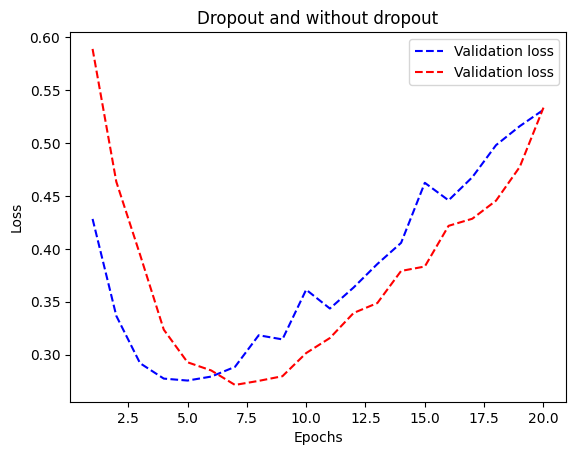

In [8]:
import matplotlib.pyplot as plt
val_loss_ori = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_ori, "b--",
         label="Validation loss")
val_loss_dp = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_dp, "r--",
         label="Validation loss")
plt.title("Dropout and without dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()